# Ejercicio de obtención de medidas de dispersión

In [17]:
# Importando librerías 
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de las gráficas

In [18]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Datos Preprocesados

In [19]:
preprocessed_penguins_df = pd.read_csv('dataset/penguins.csv')

## Medidas de dispersión

### ¿Cuál es el valor máximo de las variables?

In [20]:
preprocessed_penguins_df.max()

/tmp/ipykernel_1979/3307808605.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocessed_penguins_df.max()


species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
year                      2009
dtype: object

En este caso me regresa los valores máximos, es decir incluye variables categóricas.

Si no queremos hacerlo para variables categóricas, haremos lo siguiente:

In [21]:
preprocessed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

De esta manera solo me traerá los valores numéricos.

### ¿Cuál es el valor mínimo de las variables?

In [22]:
preprocessed_penguins_df.min()

/tmp/ipykernel_1979/3084775666.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocessed_penguins_df.min()


species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                   2007
dtype: object

En este caso me regresa los valores mínimos, es decir incluye variables categóricas.

Si no queremos hacerlo para variables categóricas, haremos lo siguiente:

In [23]:
preprocessed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### ¿Cuál es el rango de las variables?

In [24]:
preprocessed_penguins_df.max()-preprocessed_penguins_df.min()

/tmp/ipykernel_1979/1652365648.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocessed_penguins_df.max()-preprocessed_penguins_df.min()
/tmp/ipykernel_1979/1652365648.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocessed_penguins_df.max()-preprocessed_penguins_df.min()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

No podemos hacer la resta, debido a que contempla variables categóricas. Entonces lo que tenemos que hacer es contemplar solo variables numéricas.

In [25]:
preprocessed_penguins_df.max(numeric_only=True)-preprocessed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

Aquí ya me da el valor del rango en las diferentes variables. Eso quiere decir que la diferencia entre la longitud del pingüino que tiene pico mas largo y el que tiene el pico más corto es 27.5 mm. 

### ¿Cuál es la desviación estándar de las variables?

In [26]:
preprocessed_penguins_df.std(numeric_only=True)

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
year                   0.818356
dtype: float64

Recordemos la regla del 65%, 95% y 99%. 

Lo que nos dice es que si tomamos la media y sumamos o restamos la **desviación estándar**, obtendremos nuestro rango intercuartílico.

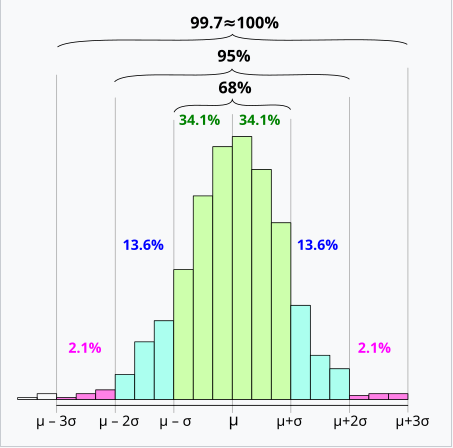

- [Regla 68, 95 , 99.7](https://es.wikipedia.org/wiki/Regla_68-95-99.7)

### Rango

#### Valor Mínimo

In [27]:
(
preprocessed_penguins_df.mean(numeric_only=True)
- 
preprocessed_penguins_df.std(numeric_only=True)
)

bill_length_mm         38.462346
bill_depth_mm          15.176376
flipper_length_mm     186.853491
body_mass_g          3399.799850
year                 2007.210714
dtype: float64

#### Valor Máximo

In [28]:
(
preprocessed_penguins_df.mean(numeric_only=True)
+ 
preprocessed_penguins_df.std(numeric_only=True)
)

bill_length_mm         49.381514
bill_depth_mm          19.125963
flipper_length_mm     214.976918
body_mass_g          5003.708922
year                 2008.847426
dtype: float64

Entonces tendría mis limites en los valores anteriores de mínimo y máximo, es decir con esto ya estaríamos calculando el **65%** de nuestros datos, **SUPONIENDO QUE NUESTRA VARIABLE SIGUE UNA DISTRIBUCIÓN NORMAL.**

En las siguientes clases vamos a ver porque nos basamos en una distribución normal. Porque nosotros no hemos revisado nuestros datos y no sabemos si cumplen este criterio.

### ¿Cual es el rango intercuartílico?

La ventaja del rango es que si poseemos datos anómalos, aunque los datos desplacen la media y otros parámetros, no desplazaran el rango, porque esta basado en percentiles. Es decir los sectores en los que nosotros partimos nuestros datos en partes iguales, así nos evitamos los sesgos que podríamos tener en caso de valores atípicos.

Vamos a hacer uso de la función `quantile()`

In [29]:
preprocessed_penguins_df.quantile(numeric_only=True,q=0.75)

bill_length_mm         48.5
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4750.0
year                 2009.0
Name: 0.75, dtype: float64

In [30]:
preprocessed_penguins_df.quantile(numeric_only=True,q=0.25)

bill_length_mm         39.225
bill_depth_mm          15.600
flipper_length_mm     190.000
body_mass_g          3550.000
year                 2007.000
Name: 0.25, dtype: float64

### Rango intercuartílico

In [31]:
(
    preprocessed_penguins_df.quantile(numeric_only=True,q=.75)
    -
    preprocessed_penguins_df.quantile(numeric_only=True,q=.25)
)

bill_length_mm          9.275
bill_depth_mm           3.100
flipper_length_mm      23.000
body_mass_g          1200.000
year                    2.000
dtype: float64

Pero que significa este número. Nos apoyaremos de una tabla para poder ver que representa.

In [32]:
(
    preprocessed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25],numeric_only=True)
)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0.75,48.500,18.7,213.0,4750.0,2009.0
0.50,44.450,17.3,197.0,4050.0,2008.0
0.25,39.225,15.6,190.0,3550.0,2007.0


Verlo de esta manera puede no ser la mejor forma, para esto haremos el uso de la matriz transpuesta.

In [33]:
(
    preprocessed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25],numeric_only=True)
    .T
)

,0.75,0.50,0.25
bill_length_mm,48.5,44.45,39.225
bill_depth_mm,18.7,17.30,15.600
flipper_length_mm,213.0,197.00,190.000
body_mass_g,4750.0,4050.00,3550.000
year,2009.0,2008.00,2007.000


O también podemos usar la función `transpose()`

In [34]:
(
    preprocessed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25],numeric_only=True)
    .transpose()
)

,0.75,0.50,0.25
bill_length_mm,48.5,44.45,39.225
bill_depth_mm,18.7,17.30,15.600
flipper_length_mm,213.0,197.00,190.000
body_mass_g,4750.0,4050.00,3550.000
year,2009.0,2008.00,2007.000


Mejor acomodado quedaría como:

In [35]:
(
    preprocessed_penguins_df
    .quantile(q=[0.25, 0.50, 0.75],numeric_only=True)
    .T
    .rename_axis('Variable')
    .reset_index()
)

,Variable,0.25,0.5,0.75
0,bill_length_mm,39.225,44.45,48.5
1,bill_depth_mm,15.600,17.30,18.7
2,flipper_length_mm,190.000,197.00,213.0
3,body_mass_g,3550.000,4050.00,4750.0
4,year,2007.000,2008.00,2009.0


Finalmente podemos añadir una columna nueva con el valor de **IQR** que es nuestro rango intercuartílico.

In [36]:
(
    preprocessed_penguins_df
    .quantile(q=[0.25, 0.50, 0.75],numeric_only=True)
    .T
    .rename_axis('Variable')
    .reset_index()
    .assign(
        IQR=lambda df : df[0.75] - df[0.25]
    )
)

,Variable,0.25,0.5,0.75,IQR
0,bill_length_mm,39.225,44.45,48.5,9.275
1,bill_depth_mm,15.600,17.30,18.7,3.100
2,flipper_length_mm,190.000,197.00,213.0,23.000
3,body_mass_g,3550.000,4050.00,4750.0,1200.000
4,year,2007.000,2008.00,2009.0,2.000


Así podemos calcular el rango y si hacemos la diferencia de 0.75 y 0.25, podremos saber un poco sobre donde están distribuidos el 50% de mis datos.

Así vamos a poder saber que tan lejos están nuestros datos de la **media**.

### ¿Cómo puedo visualizar la distribución de una variable?
Para entender mejor los datos, siempre es bueno ver una gráfica que los represente. Ademas nos ayudará a analizar como se comportan los datos.

Podemos visualizarlos de la siguiente forma.

#### Histograma

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

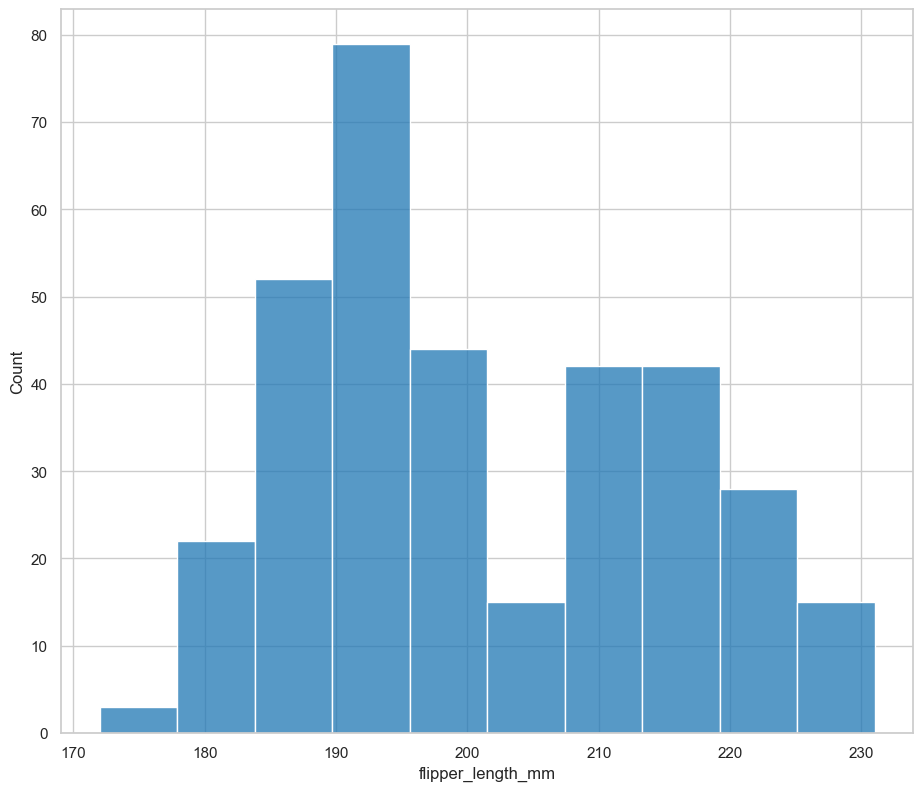

In [37]:
sns.histplot(
    data=preprocessed_penguins_df,
    x="flipper_length_mm",
)

Así podemos ver que el valor entre cada **bin** es de 5. Pero tenemos que ajustarlo, porque podríamos estar perdiendo información muy importante. Pero podemos ver que hay un comportamiento algo peculiar, debido a que existen un valor mínimo de manera abrupta.

Text(204.91520467836258, 17.955, 'Promedio')

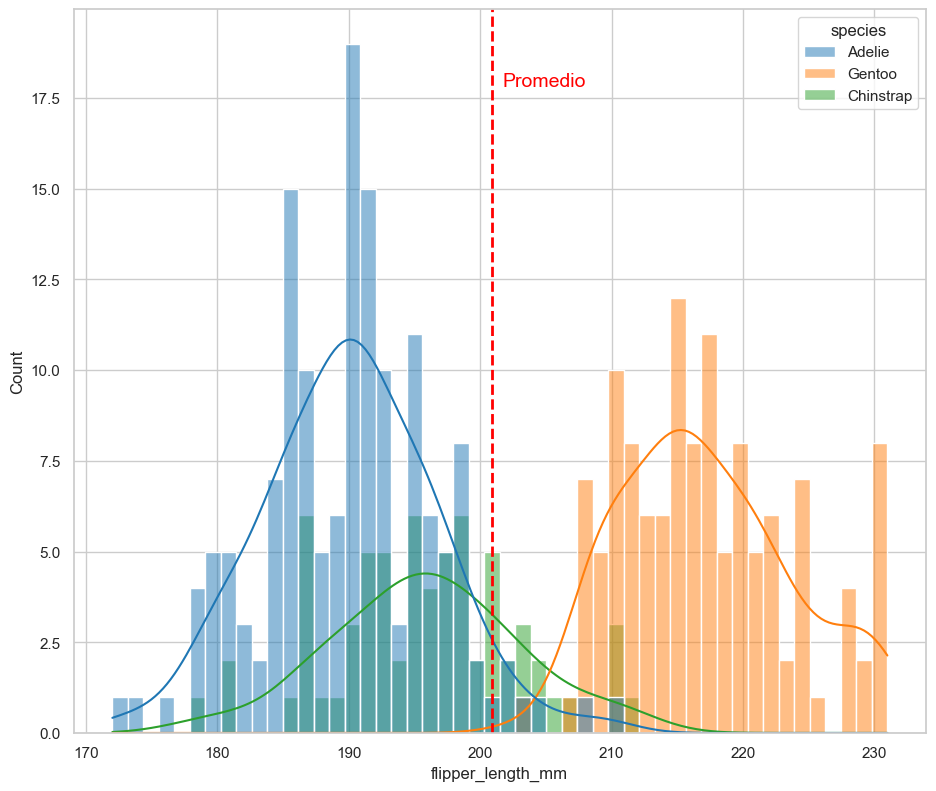

In [38]:
sns.histplot(
    data=preprocessed_penguins_df,
    x="flipper_length_mm",
    hue='species',
    bins=50,
    kde=True,
)
#Media o promedio
mean_value=preprocessed_penguins_df.flipper_length_mm.mean(numeric_only=True)
plt.axvline(
    x=mean_value,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label='Promedio'
)
plt.text(
    x=mean_value + 4,  # Ajusta la posición x según sea necesario
    y=plt.ylim()[1] * 0.9,  # Ajusta la posición y según sea necesario
    s='Promedio',
    color='red',
    fontsize=14,
    ha='center',
    va='center'
)

Text(42.1, 16.065, 'Moda')

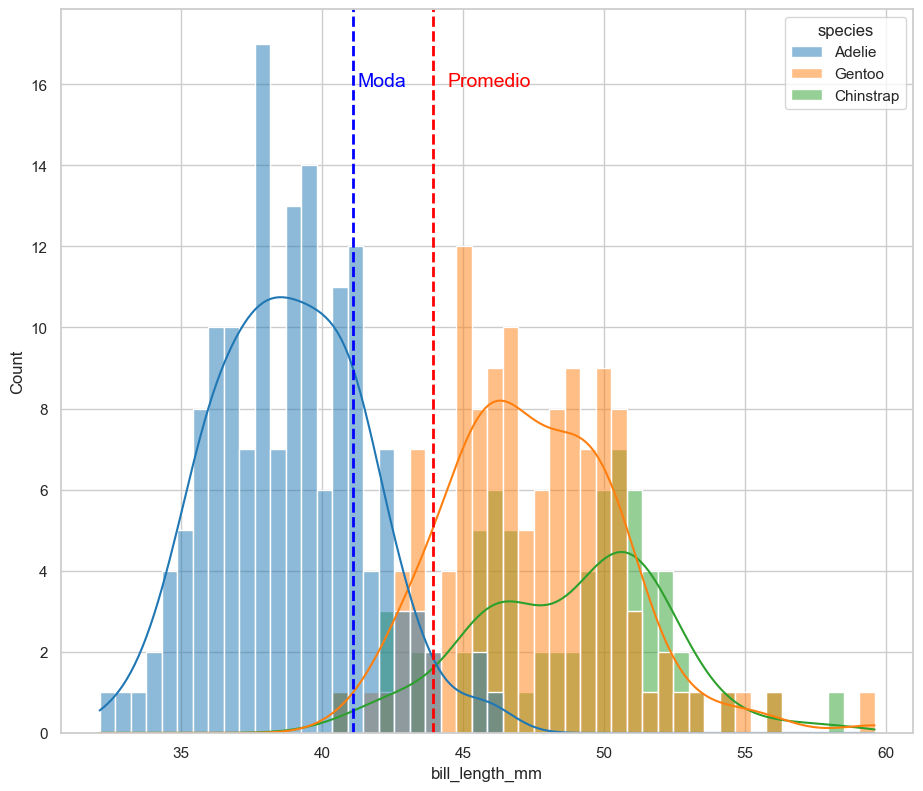

In [39]:
sns.histplot(
    data=preprocessed_penguins_df,
    x="bill_length_mm",
    hue='species',
    bins=50,
    kde=True,
)
#Media o promedio
mean_value=preprocessed_penguins_df.bill_length_mm.mean(numeric_only=True)
plt.axvline(
    x=mean_value,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label='Promedio'
)
plt.text(
    x=mean_value + 2,  # Ajusta la posición x según sea necesario
    y=plt.ylim()[1] * 0.9,  # Ajusta la posición y según sea necesario
    s='Promedio',
    color='red',
    fontsize=14,
    ha='center',
    va='center'
)

moda=preprocessed_penguins_df.bill_length_mm.mode().iloc[0]

plt.axvline(
    x=moda,
    color="blue",
    linestyle="dashed",
    linewidth=2,
    label='Moda'
)

plt.text(
    x=moda+1,  # Ajusta la posición x según sea necesario
    y=plt.ylim()[1] * 0.9,  # Ajusta la posición y según sea necesario
    s='Moda',
    color='blue',
    fontsize=14,
    ha='center',
    va='center'
)

Text(17.651169590643274, 16.065, 'Promedio')

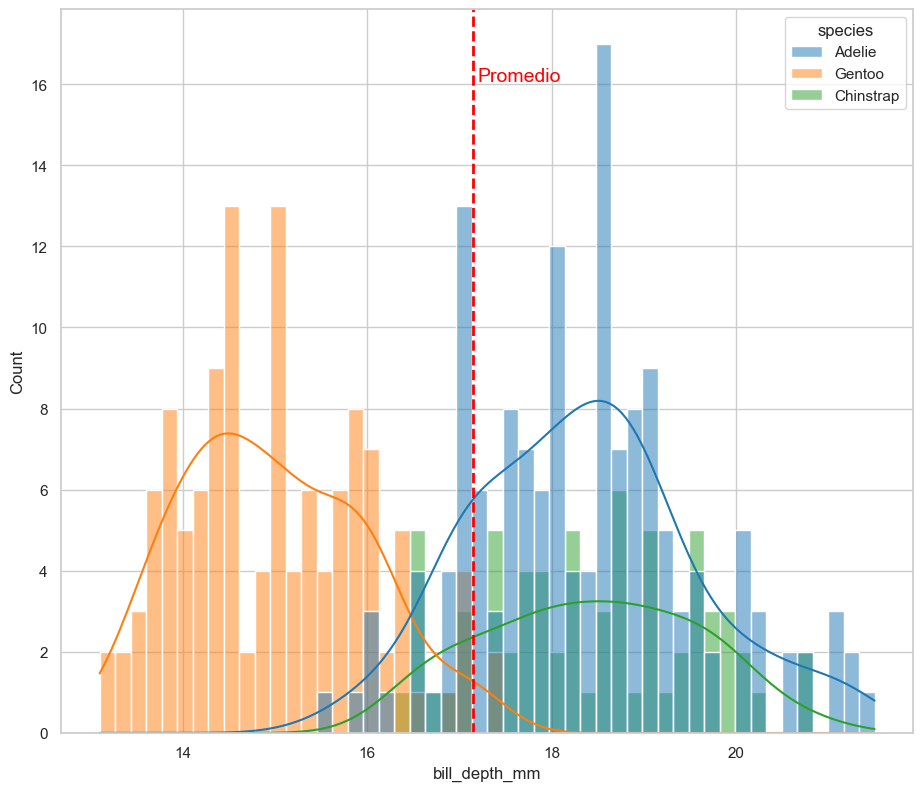

In [40]:
sns.histplot(
    data=preprocessed_penguins_df,
    x="bill_depth_mm",
    hue='species',
    bins=50,
    kde=True,
)
#Media o promedio
mean_value=preprocessed_penguins_df.bill_depth_mm.mean(numeric_only=True)
plt.axvline(
    x=mean_value,
    color="red",
    linestyle="dashed",
    linewidth=2,
     label='Promedio'
)
plt.text(
    x=mean_value+0.5,  # Ajusta la posición x según sea necesario
    y=plt.ylim()[1] * 0.9,  # Ajusta la posición y según sea necesario
    s='Promedio',
    color='red',
    fontsize=14,
    ha='center',
    #va='center'
)

#### Box plot

<AxesSubplot: xlabel='flipper_length_mm'>

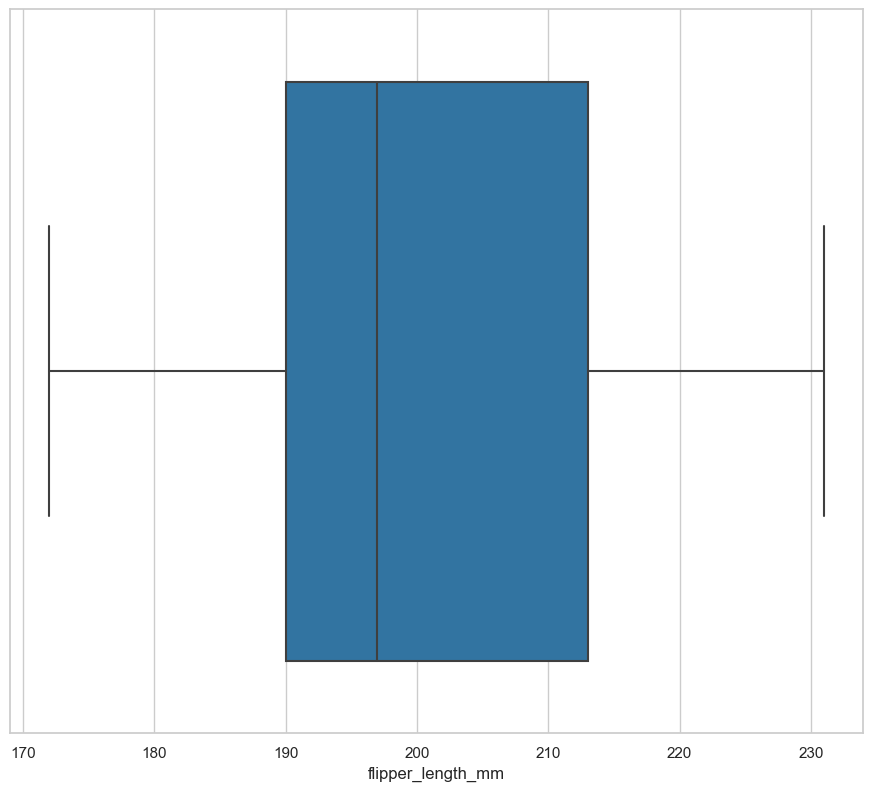

In [41]:
sns.boxplot(
    data=preprocessed_penguins_df,
    x='flipper_length_mm',
    showfliers=True,
    #y='species'
)

Ya tengo mi diagrama que me deja ver de manera intuitiva el rango de nuestros datos. Por ejemplo la longitud de las aletas de nuestros pingüinos van alrededor de 170 a 230, y después el 50% de nuestros datos están entre 190 y 213. Y si nos fijamos en la caja, la rayita que representa a la media no se encuentra la mitad, esto quiere decir que nuestros datos están sesgados hacia un lado o algo está pasando en nuestros datos. 

Esto es una desventaja de los **boxplot**, porque aunque me dice que no está distribuido simétricamente, no me habla explícitamente sobre la forma de la distribución, para ello contamos con un **Histograma**.


Al igual nuestro **Histograma** tiene limitaciones, porque nosotros necesitamos definir un número de **bins** adecuado. Nos apoyamos con el uso del parámetro `bins_width`. Porque debido a que si no ajustamos adecuadamente nuestros bins nos podría engañar la representación del **histograma**.

Para ello tenemos una función llamada **freedman**, que toma en cuenta el rango intercuartílico y trata de estimar el bind width optimo


In [42]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

Intentemos usar la función, para observar si podemos usarla.

Text(17.651169590643274, 41.580000000000005, 'Promedio')

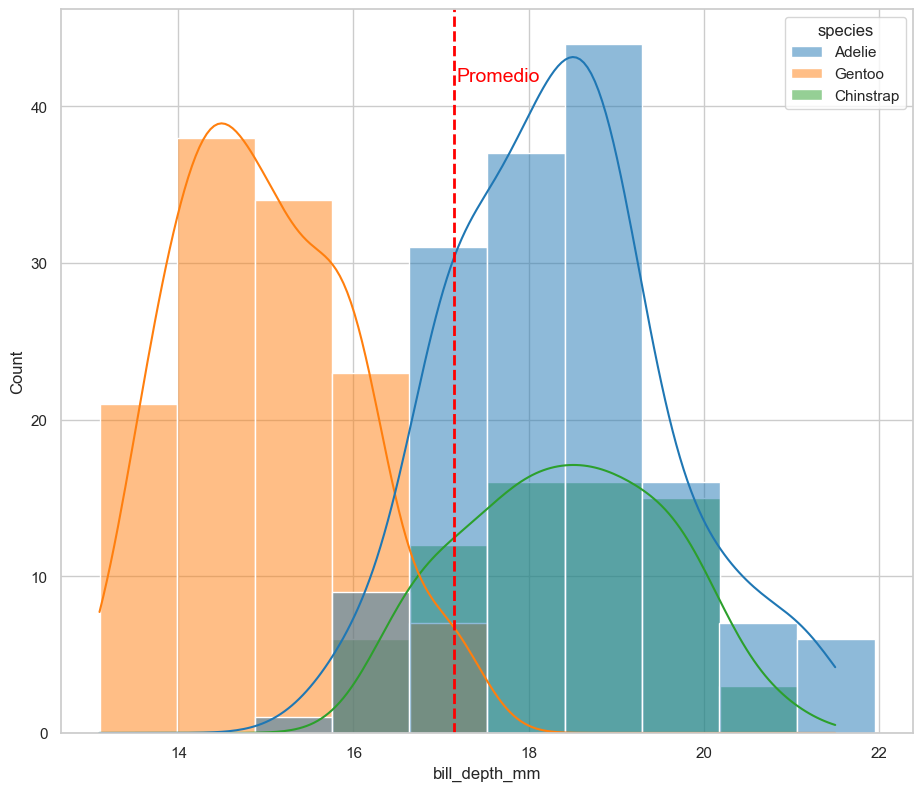

In [46]:
sns.histplot(
    data=preprocessed_penguins_df,
    x="bill_depth_mm",
    hue='species',
    bins=30,
    binwidth=freedman_diaconis_bindwidth(preprocessed_penguins_df['bill_depth_mm']),
    kde=True,
)
#Media o promedio
mean_value=preprocessed_penguins_df.bill_depth_mm.mean(numeric_only=True)
plt.axvline(
    x=mean_value,
    color="red",
    linestyle="dashed",
    linewidth=2,
     label='Promedio'
)
plt.text(
    x=mean_value+0.5,  # Ajusta la posición x según sea necesario
    y=plt.ylim()[1] * 0.9,  # Ajusta la posición y según sea necesario
    s='Promedio',
    color='red',
    fontsize=14,
    ha='center',
    #va='center'
)

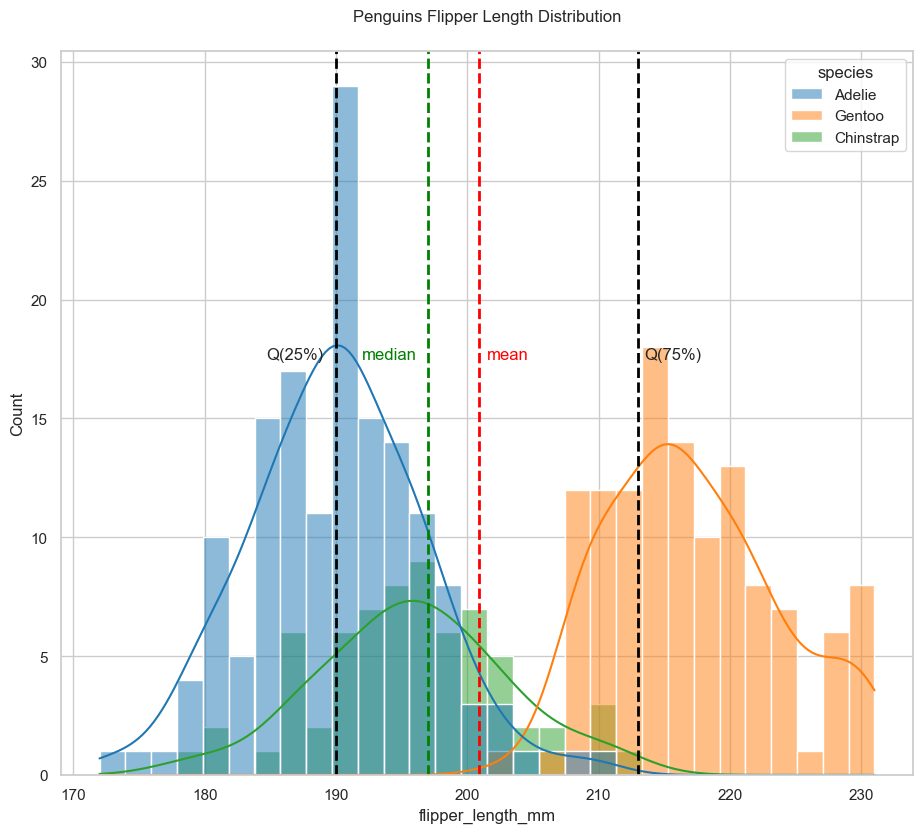

In [47]:
var_flipper_len = preprocessed_penguins_df['flipper_length_mm']

g=sns.histplot(
    data=preprocessed_penguins_df,
    x='flipper_length_mm',
    bins=30,
    #binwidth=freedman_diaconis_bindwidth(preprocessed_penguins_df['flipper_length_mm']),
    hue='species',
    kde=True
)
g.set_title('Penguins Flipper Length Distribution', y=1.03)

# Mean(Red)
plt.axvline(
    x =var_flipper_len.mean(),
    linestyle="dashed",
    color="r",
    linewidth=2
)

# Median(Green)
plt.axvline(
    x=var_flipper_len.median(),
    linestyle="dashed",
    color="g",
    linewidth=2
)

# Q_75(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.75),
    linestyle="dashed",
    color="k",
    linewidth=2
)

# Q_25(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.25),
    linestyle="dashed",
    color="k",
    linewidth=2
)

plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()